In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Data Preprocessing

In [3]:
data = pd.read_csv('Walmart_Dataset.csv', encoding='latin1')

In [4]:
data.head(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,06/09/2014,06/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,06/09/2014,06/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,NaN,1.9656
7,8,CA-2014-115812,06/09/2014,06/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,06/09/2014,06/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,06/09/2014,06/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [5]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        23
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount         49
Profit            0
dtype: int64

In [6]:
sum(data.duplicated())

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9971 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
# Data Exploration and Cleaning
numeric_columns = data.select_dtypes(include=np.number).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())  # Replace missing numerical values with mean
for column in data.columns:
    data[column] = data[column].fillna(data[column].mode()[0])

In [9]:
# Data Exploration and Cleaning
print(f"Data Description : {data.describe()}")

Data Description :             Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156972   
std    2885.163629  32063.693350    623.245101     2.225110     0.206161   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [10]:
# Print summary statistics and information about the dataset
print(f"Data Information : {data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

<AxesSubplot:>

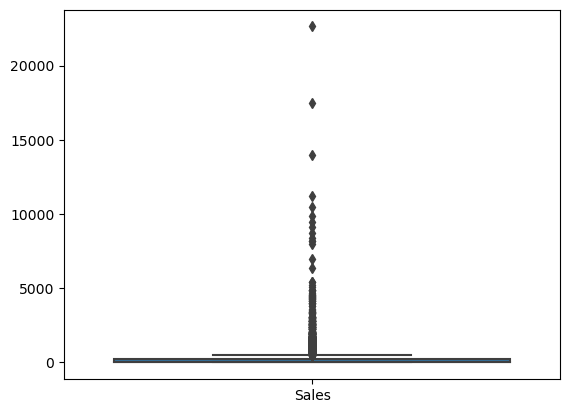

In [11]:
sns.boxplot(data=data[['Sales']])

In [12]:
# Handling outliers in the 'Sales' column using IQR
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
filter = (data['Sales'] >= Q1 - 1.5 * IQR) & (data['Sales'] <= Q3 + 1.5 * IQR)
data = data.loc[filter]

<AxesSubplot:>

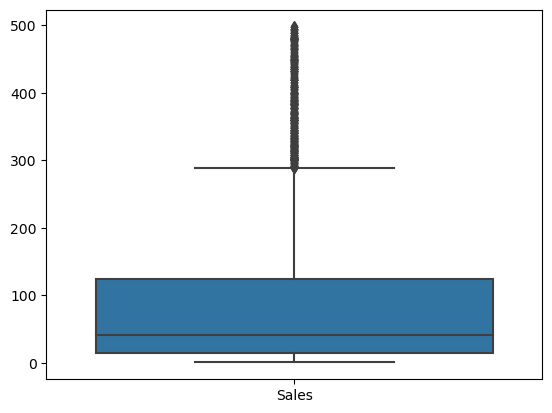

In [13]:
sns.boxplot(data=data[['Sales']])

# Data Visualization

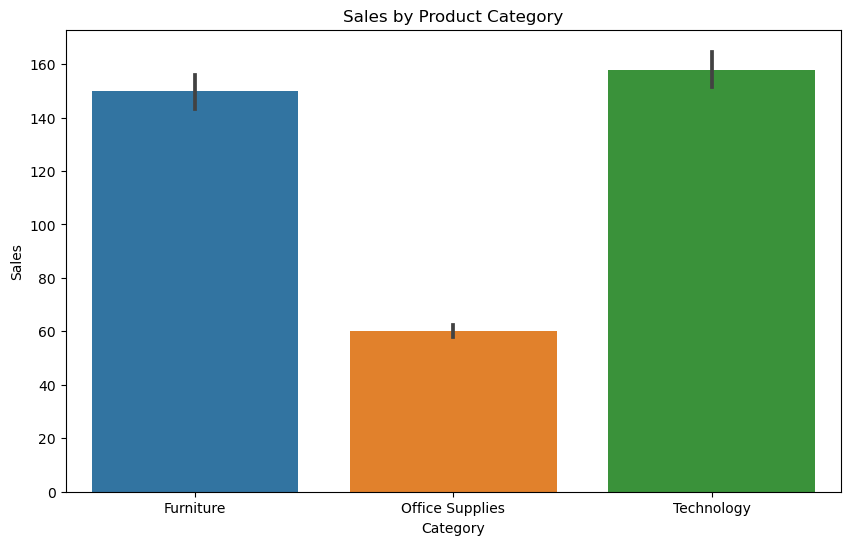

In [14]:
# Data Visualization
# Visualizing sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=data)
plt.title('Sales by Product Category')
plt.show()

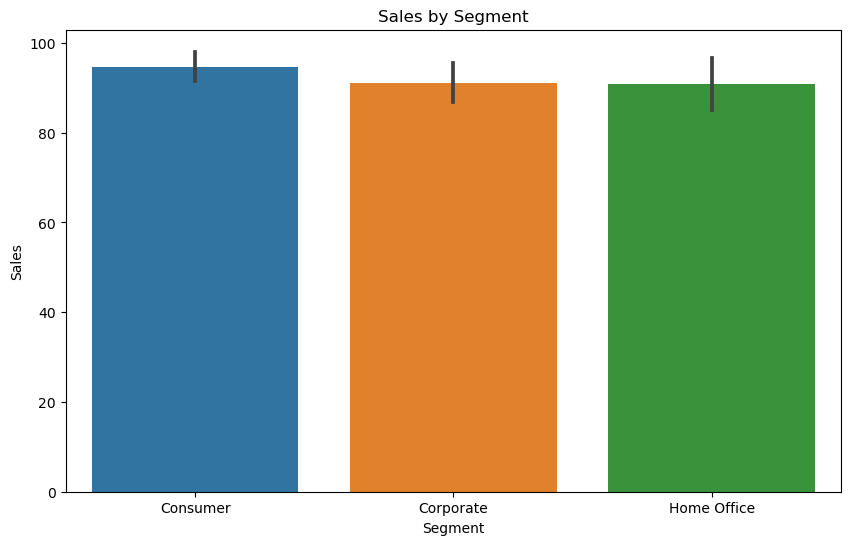

In [15]:
# Visualizing sales by Segments
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=data)
plt.title('Sales by Segment')
plt.show()

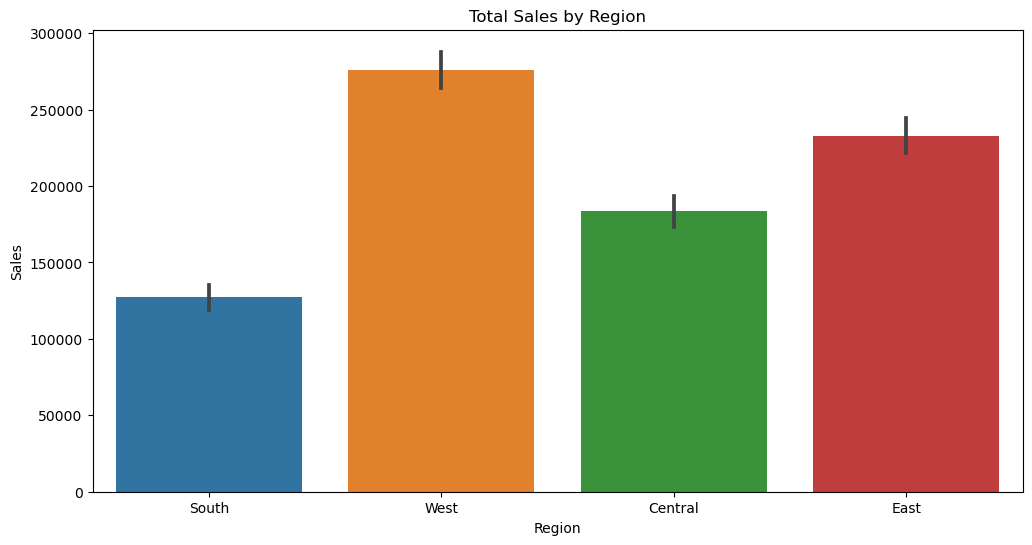

In [16]:
# Visualizing sales by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=data, estimator=np.sum)
plt.title('Total Sales by Region')
plt.show()

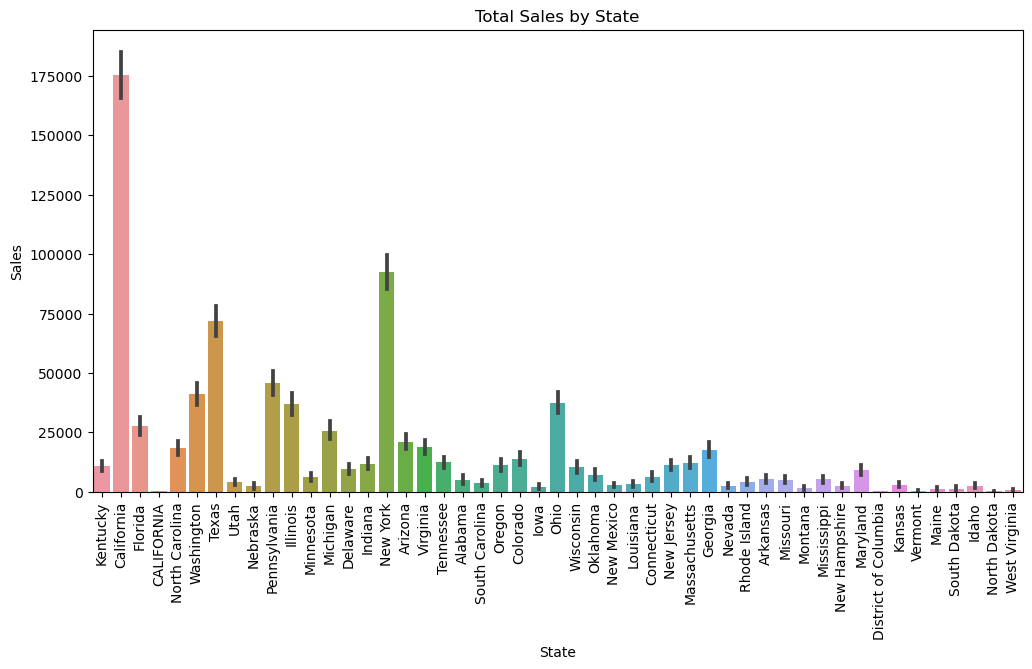

In [17]:
# Visualizing sales by state
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', data=data, estimator=np.sum)
plt.title('Total Sales by State')
plt.xticks(rotation=90)
plt.show()

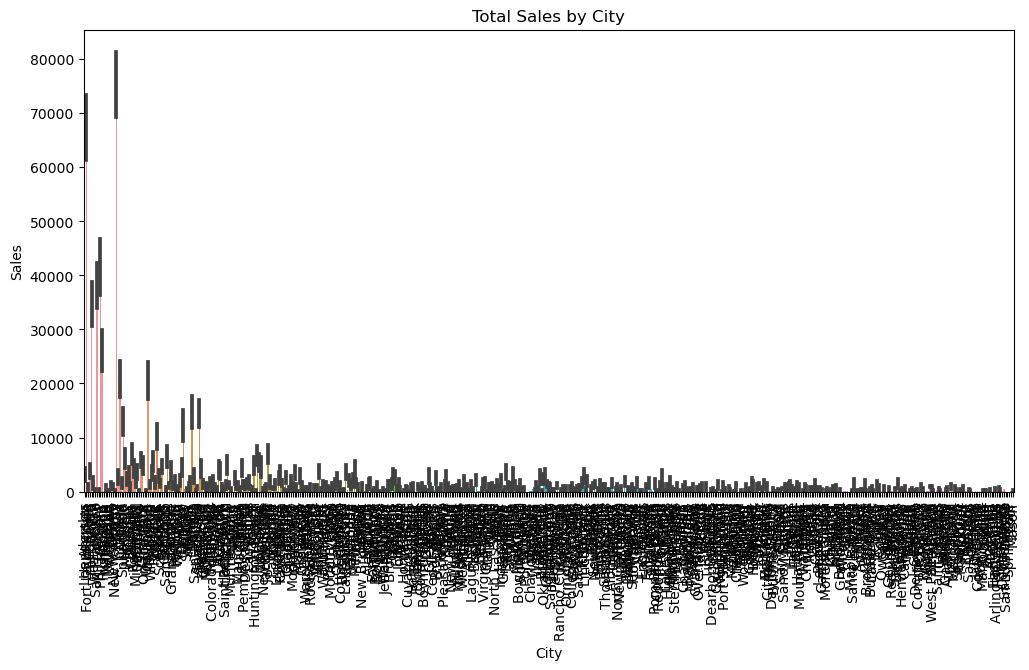

In [18]:
# Visualizing sales by city
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Sales', data=data, estimator=np.sum)
plt.title('Total Sales by City')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

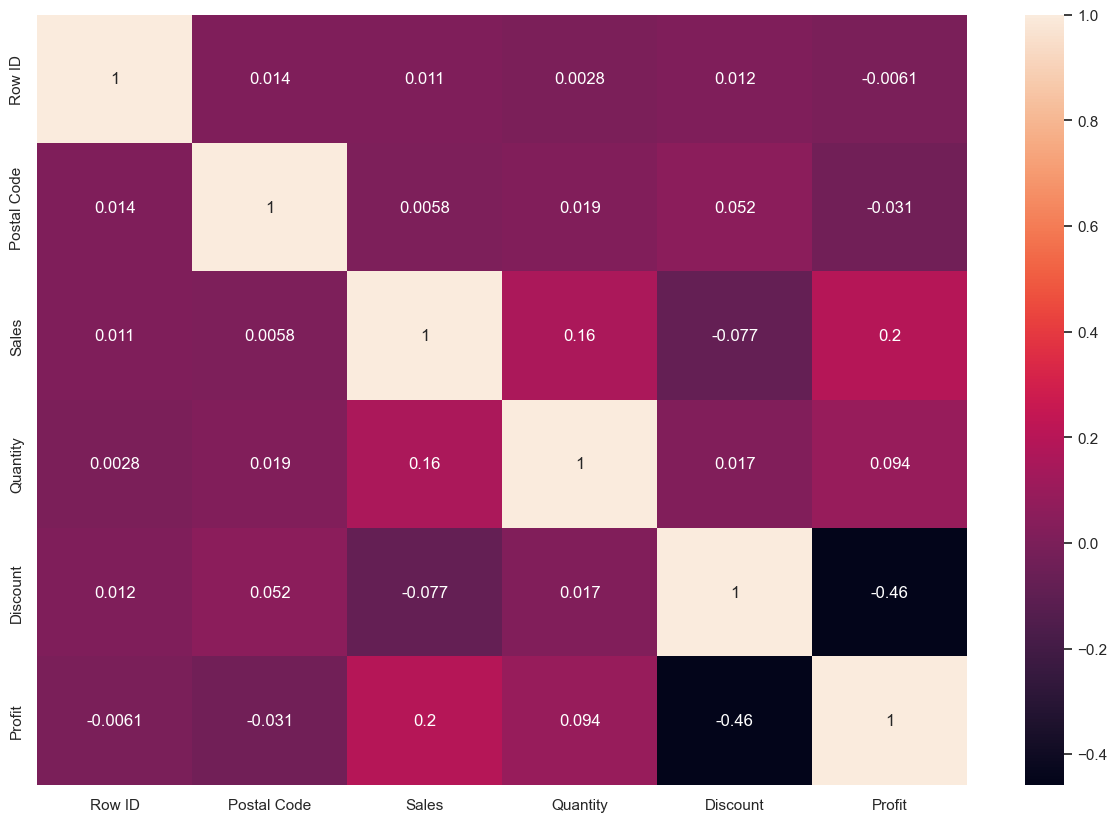

In [19]:
# plotting the correlation matrix
data.corr()
sns.set(rc={'figure.figsize': (15,10)})
sns.heatmap(data.corr(),annot=True)

# Linear Regression Model and its Evaluation

In [20]:
# Machine Learning Model for Sales Prediction
# Prepare data for regression model
X = pd.get_dummies(data[['Category', 'Region', 'Quantity', 'Discount', 'Profit', 'Ship Mode']])
y = data['Sales']

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
# Make predictions and evaluate the model
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("R^2 Score:", r2_score(y_test, predictions))

Mean Squared Error: 10120.497607525915
R^2 Score: 0.2364807892913947


# Polynomial Regression Model and its Evaluation

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=False)

In [41]:
poly_feature=poly.fit_transform(X)

In [42]:
x_train_poly,x_test_poly,y_train_poly,y_test_poly=train_test_split(poly_feature,y,test_size=0.4,random_state=20)

In [43]:
reg=LinearRegression()
reg.fit(x_train_poly,y_train_poly)

LinearRegression()

In [44]:
y_predict_poly=reg.predict(x_test_poly)
print("Mean Squared Error:", mean_squared_error(y_test_poly, y_predict_poly))
print("R^2 Score:", r2_score(y_test_poly, y_predict_poly))

Mean Squared Error: 6544.476293994339
R^2 Score: 0.48706787479793856


# Decision Tree Regressor Model and its Evaluation

In [45]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {'max_depth': range(1, 20), 'min_samples_split': range(2, 10)}
DTR = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)

In [46]:
DTR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 20),
                         'min_samples_split': range(2, 10)})

In [47]:
y_pred=DTR.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 4115.344854734695
R^2 Score: 0.6895266441302097


# Random Forest Regressor Model and its Evaluation

In [48]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()

In [49]:
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
y_pred=RFR.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3307.207793471192
R^2 Score: 0.7504948094407218


# Time Series

In [51]:
# Time Series Analysis for Sales
# Convert 'Order Date' to datetime and set it as index
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)

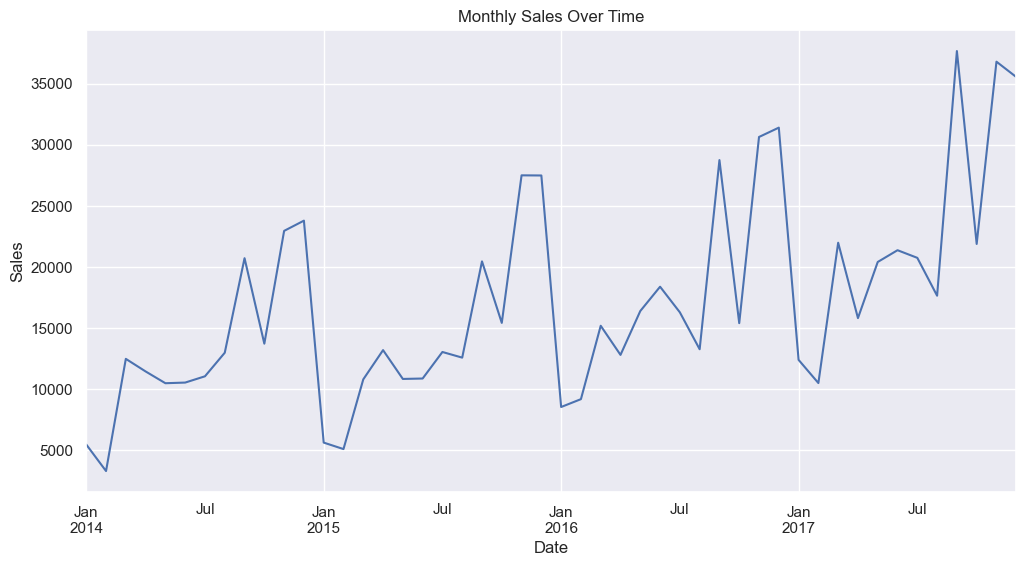

In [52]:
monthly_sales = data['Sales'].resample('MS').sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [53]:
# Check if the time series is stationary
result = adfuller(monthly_sales)
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])

In [54]:
# If not stationary, make it stationary
monthly_sales_diff = monthly_sales.diff().dropna()

<Figure size 1200x600 with 0 Axes>

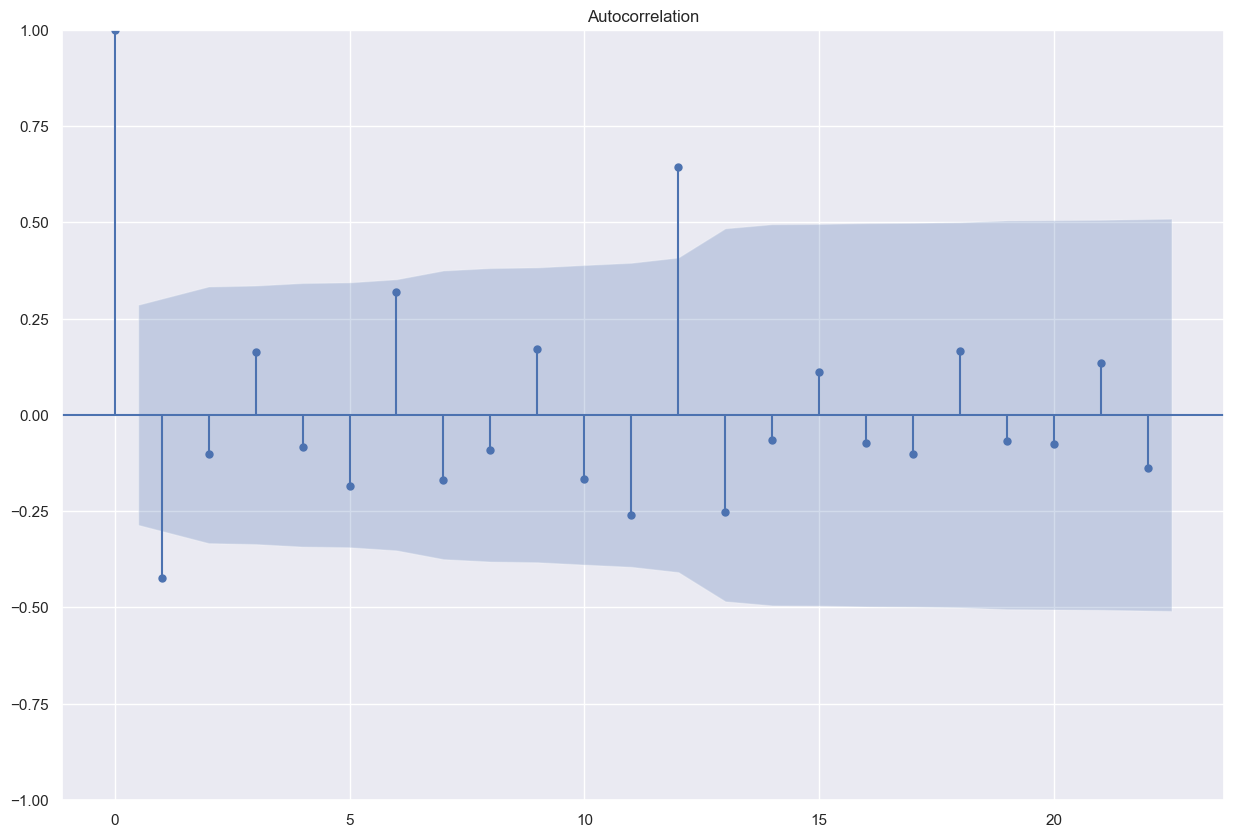

In [55]:
# Plot ACF and PACF charts
plt.figure(figsize=(12, 6))
plot_acf(monthly_sales_diff, lags=22)
plt.show()

<Figure size 1200x600 with 0 Axes>

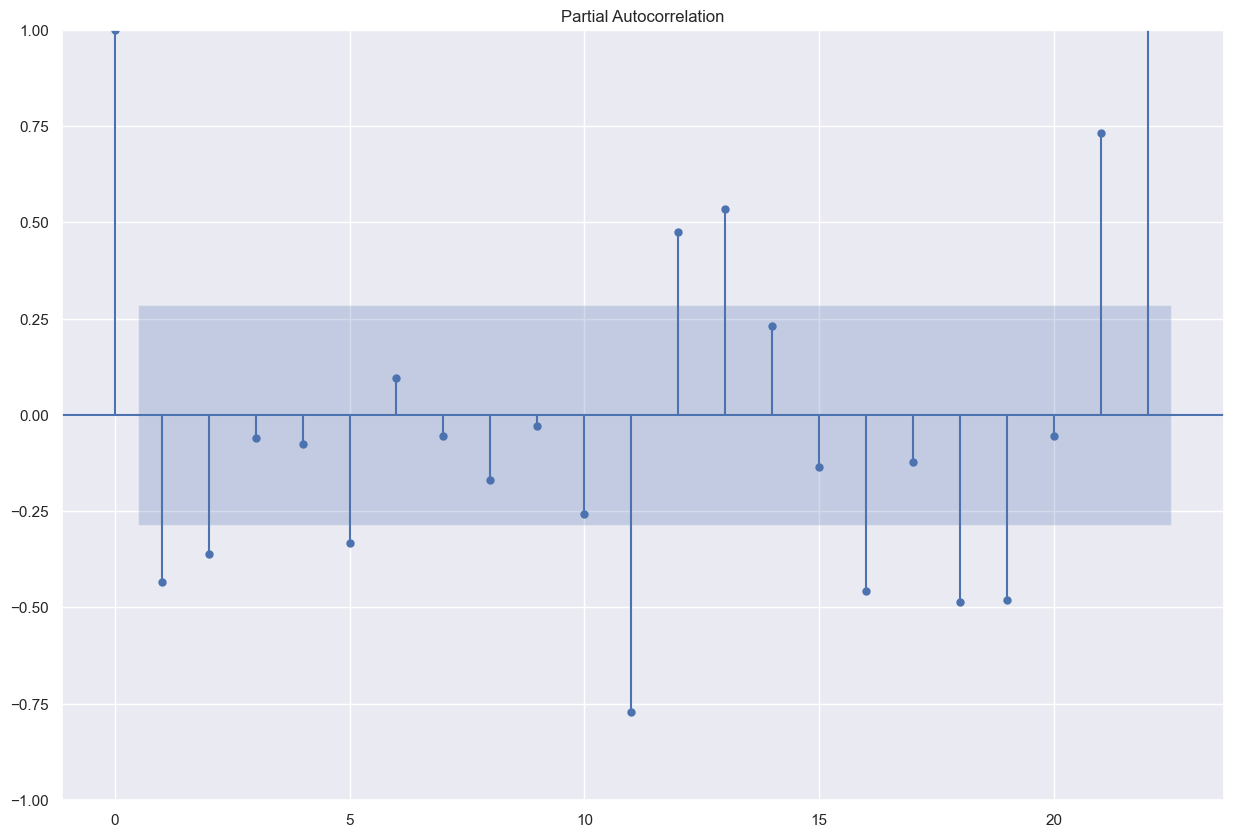

In [56]:
plt.figure(figsize=(12, 6))
plot_pacf(monthly_sales_diff, lags=22)
plt.show()

In [57]:
# Build ARIMA model
model = ARIMA(monthly_sales, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -483.158
Date:                Mon, 20 May 2024   AIC                            978.316
Time:                        02:12:42   BIC                            989.417
Sample:                    01-01-2014   HQIC                           982.494
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5769      0.206     -2.801      0.005      -0.981      -0.173
ar.L2         -0.3807      0.225     -1.691      0.091      -0.822       0.061
ar.L3         -0.1719      0.278     -0.619      0.5

In [58]:
# Predict future sales
forecast = model_fit.forecast(steps=12)
print(forecast)

2018-01-01    29703.276657
2018-02-01    28392.049914
2018-03-01    33065.341774
2018-04-01    27557.833510
2018-05-01    30891.097234
2018-06-01    32355.699939
2018-07-01    30532.323447
2018-08-01    30263.488607
2018-09-01    31801.306341
2018-10-01    29971.051219
2018-11-01    30450.151688
2018-12-01    31228.799343
Freq: MS, Name: predicted_mean, dtype: float64


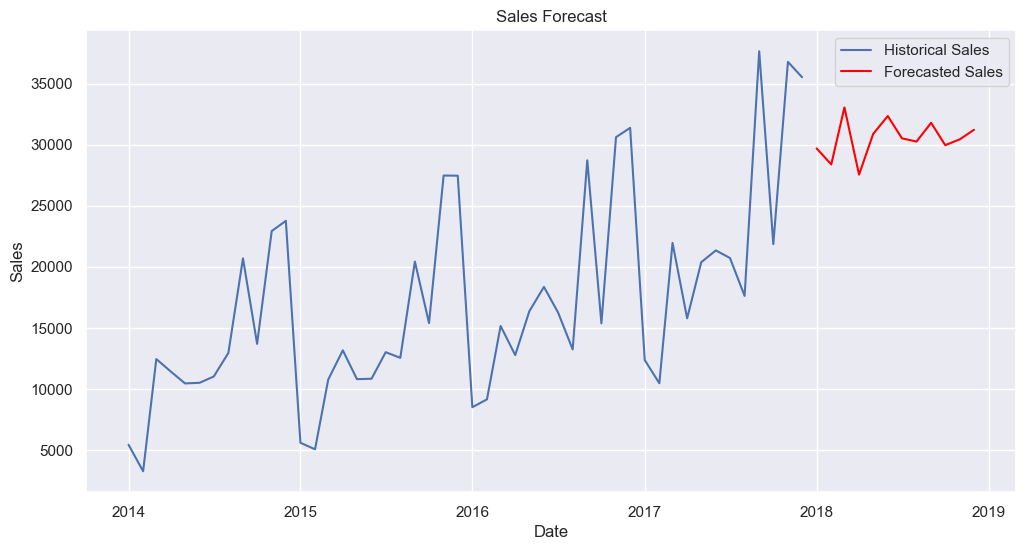

In [59]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()